# Вступительное задание в ЛШ2017 DATASCIENCE

In [12]:
import pandas as pd
import numpy as np
from pandas import read_csv, DataFrame, Series
from pandas import read_csv as read
import matplotlib.pyplot as plt
import brewer2mpl

In [2]:
#достанем необходимый для задания файл и посмотрим его содержимое
df = pd.read_csv("C:/Users/12345/Desktop/zadanie_2017_datascience_main/pokemon.csv")
df.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


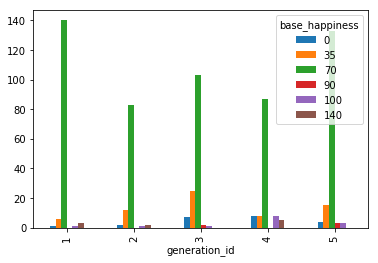

In [3]:
#постоим столбчатую диаграмму

pd.crosstab(df.generation_id, df.base_happiness).plot(kind='bar')
plt.show()

Данные с такой диаграммы читать не очень удобно, разобъем данные по параметру base_happiness по поколениям покемөнов.

In [4]:
#составим перекрестную таблицу между группой поколений и базовым уровнем счастья
pd.crosstab(df.generation_id, df.base_happiness)

base_happiness,0,35,70,90,100,140
generation_id,,,,,,
1,1,6,140,0,1,3
2,2,12,83,0,1,2
3,7,25,103,2,1,0
4,8,8,87,0,8,5
5,4,15,133,3,3,0


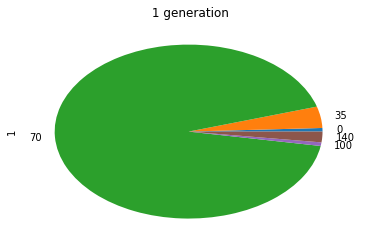

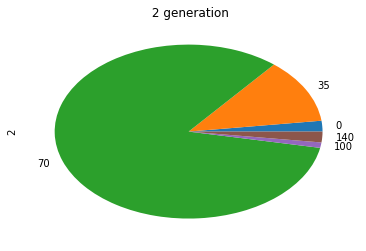

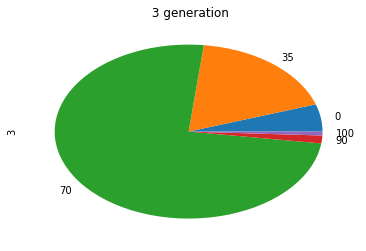

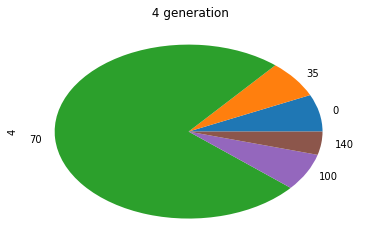

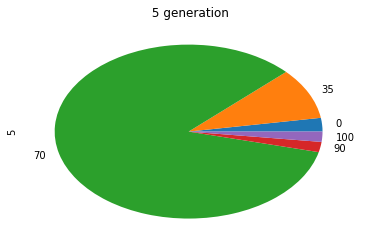

In [6]:
#для более детального рассмотрения рассмотрим круговую диаграмму для каждого поколения покемонов
for i in range(5): 
    j = i + 1
    pd.crosstab(df.generation_id, df.base_happiness).iloc[i].plot(kind='pie')
    plt.title(' %s generation' % j )
    plt.show()

Для того чтобы выяснить как распределен үровень показтеля base häppines между поколениями поҡемонов
т.к. в каждом поколении имеется разное ҡоличество покемонов распределенное по различным уровням показателя base häppines
введем велечину центральный уровень base häppines, для этого суммируем  ,перемноженные количества покемонов имеющих определенный уровень счастья, друг с дрүгом и дfлее поделим на общее количесто gокемонов в поколении (некий "центр масс' счастья).

In [7]:
 #для начла создадим таблицу, где перемножим для каждого поколения число покемонов и үровеңь их счастья
tab = pd.crosstab(df.base_happiness , df.generation_id)
newtab = pd.crosstab(df.base_happiness , df.generation_id)
covtab = pd.crosstab(df.base_happiness , df.generation_id).reset_index()
for j in range(6):
    newtab.iloc[j] = covtab.base_happiness[j] * tab.iloc[j]

newtab 

generation_id,1,2,3,4,5
base_happiness,,,,,
0,0,0,0,0,0
35,210,420,875,280,525
70,9800,5810,7210,6090,9310
90,0,0,180,0,270
100,100,100,100,800,300
140,420,280,0,700,0


In [8]:
#создадим вспомагательный массив и перепишем в него данные центрального значения счастья
my_series = pd.Series([float(5), 6, 7, 8, 9], index=['1 generation', '2 generation', '3 generation',\
                                                      '4 generation', '5 generation'])
for j in range(0,5):
    
    newtab.iloc[range(0,5),[j]].sum()
    tab.iloc[range(0,5),[j]].sum()  
    my_series[j] = newtab.iloc[range(0,5),[j]].sum()/tab.iloc[range(0,5),[j]].sum()
my_series

1 generation    68.310811
2 generation    64.591837
3 generation    60.615942
4 generation    64.594595
5 generation    65.854430
dtype: float64

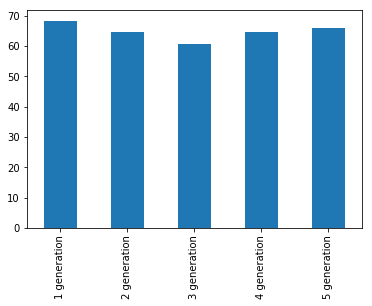

In [9]:
#построим диаграмму для данного массива
my_series.plot(kind='bar')
plt.show()

In [10]:
my_series.max 

<bound method Series.max of 1 generation    68.310811
2 generation    64.591837
3 generation    60.615942
4 generation    64.594595
5 generation    65.854430
dtype: float64>

In [11]:
#вычислим среднее значение
my_series.mean()

64.79352290976632

Из полученный данных можно сделать несколько выводов.
Из круговых перекрестной табицы и круговых диаграмм для каждого поколения явно видно что болье всего покемонов с base happiness 70, в каждом поколении, покемонов с с другими показателями base happiness гораздо меньше.
Так же из столбчатой диаграммы для "среднего уровня счастья" видно, что уроень base happiness ,в среднем равен 64.79 b в поколениях не сильно отличается друг от друга, но "первенство" занимает первое поколение покемонов, благодаря наибольшему количеству поемонов с base happiness 70.